In [1]:
# Imports we will use
import torch
import gc
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Function
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import random
from pathlib import Path
from sklearn.metrics import r2_score
from astropy.visualization import make_lupton_rgb
from sklearn.manifold import Isomap
from train_utils import *
import time
import os
import json

%matplotlib inline
plt.rcParams.update({'font.size': 12})

# Set Seed
torch.manual_seed(22)

# Find if cuda is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## Load Data

In [2]:
# Specify paths, load in data, and subsample labels
head = Path.cwd().parents[1]
source_img_path = head / 'data/mb_lenscolor_source/mb_lenscolor_source.npy'
target_img_path = head / 'data/mb_lenscolor_target/mb_lenscolor_target.npy'
source_meta = head / 'data/mb_lenscolor_source/mb_lenscolor_source_metadata.csv'
target_meta = head / 'data/mb_lenscolor_target/mb_lenscolor_target_metadata.csv'
batch_size = 64
source_train_dataloader, source_test_dataloader, source_val_dataloader, source_data = create_dataloader(source_img_path, source_meta, batch_size)
target_train_dataloader, target_test_dataloader, target_val_dataloader, target_data = create_dataloader(target_img_path, target_meta, batch_size)
isomap_source_label_sample = pd.read_csv(source_meta)['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].tolist()[:1000]
isomap_target_label_sample = pd.read_csv(target_meta)['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].tolist()[:1000]

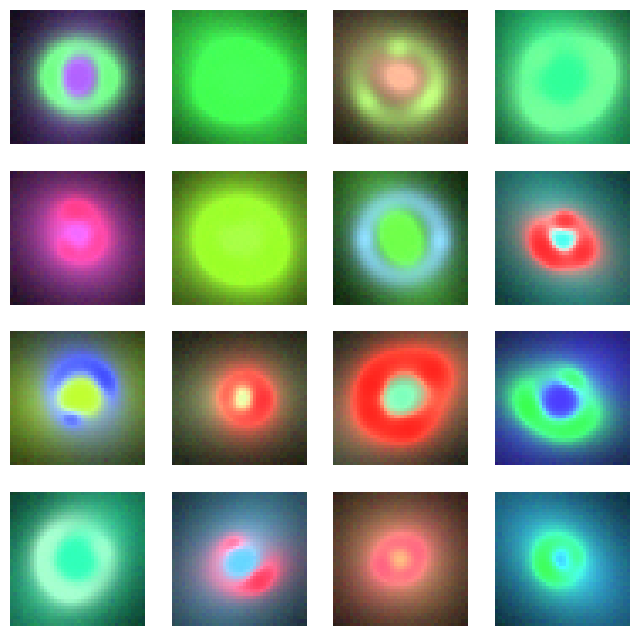

In [3]:
# Visualize source data
visualize_data(source_data)

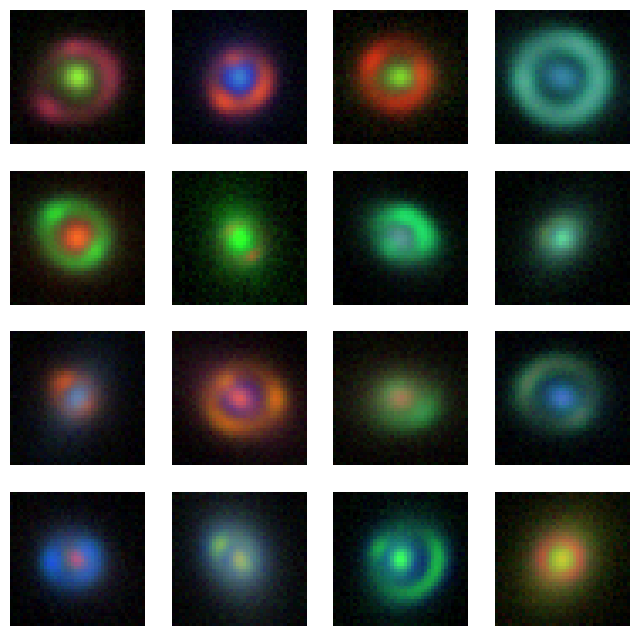

In [4]:
# Visualize target data
visualize_data(target_data)

## Model Setup

In [5]:
# Choose how you prefer to evolve beta and the DA Weight
def da_weight_function(epoch):
    """ Linear evolving DA weighting in loss function. """
    da_weight = init_wt_da - ((init_wt_da - final_wt_da) * (epoch / n_epoch))
    return da_weight

def beta_function(epoch):
    """ Linear evolving beta weighting in loss function until halfway through total epochs. """
    beta_val = beta_init - (beta_init - beta_final) * (epoch / n_epoch)
    return beta_val

# Initialize hyperparameters
learning_rate = 3e-5
n_epoch = 250
init_wt_da = 1.4
final_wt_da = 1.0
beta_init = 1.0
beta_final = 0.0

In [6]:
# Initialize model
model = NeuralNetworkMVE(npix=40).cuda()

# Loss Functions / Optimizers
regressor_loss_fn = nn.MSELoss().cuda()
da_loss_fn = MMD_loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
# To continue training from a past model, enter path into load_mod_name
# Else, enter None, and you still have to run the function.
# Then, enter save_mod_name to save for the current run  

load_mod_name = None # "models/start_code_test_2"
stats, model, optimizer, best_target_R2, best_mve_loss = initialize_state(load_mod_name, model, optimizer)


#save_mod_name = load_mod_name # may overwrite loaded model
save_mod_name = "models/mve_v7_aug5_0045"

## Train

Beginning Training...
Generating Isomap...


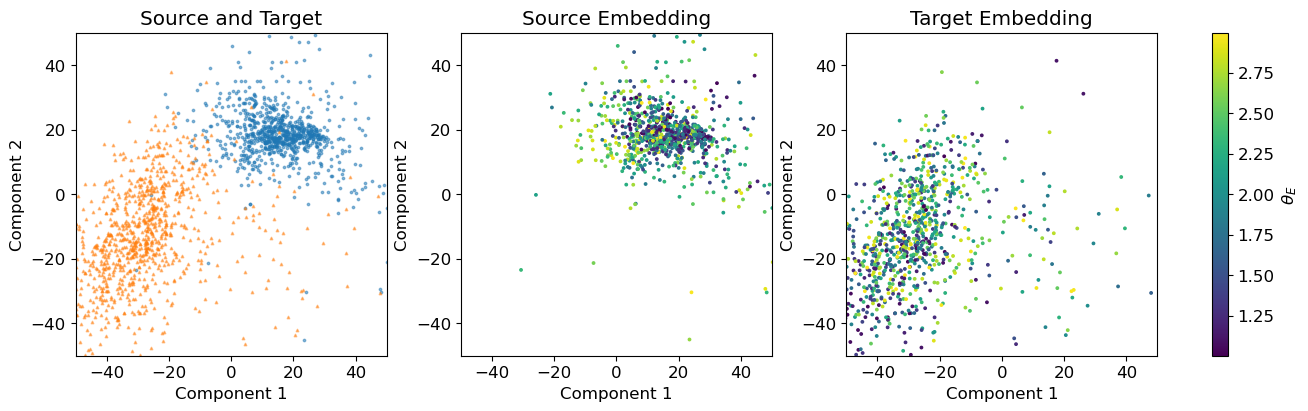


Epoch 0: 12.40s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.3155
	Train Regression Loss: : 1.5881
	Train Mve Loss: : 0.6630
	Train R2 Score: : -3.8758
 Validation Statistics:
	Val Source Regression Loss: : 0.4044
	Val Target Regression Loss: : 0.4190
	Val Source R2 Score: : -0.2330
	Val Target R2 Score: : -0.2946
	Val Source Mve Loss: : 0.0715
	Val Target Mve Loss: : 0.0773
Saving Model... Done.
Saving Model MVE... Done.

Epoch 1: 11.22s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.1512
	Train Regression Loss: : 0.2869
	Train Mve Loss: : -0.0185
	Train R2 Score: : 0.1251
 Validation Statistics:
	Val Source Regression Loss: : 0.2338
	Val Target Regression Loss: : 0.2526
	Val Source R2 Score: : 0.2830
	Val Target R2 Score: : 0.2186
	Val Source Mve Loss: : -0.0608
	Val Target Mve Loss: : -0.0510
Saving Model... Done.
Saving Model MVE... Done.

Epoch 2: 11.57s
-------------------------------
 Training Statistics:
	Train Da Loss: :

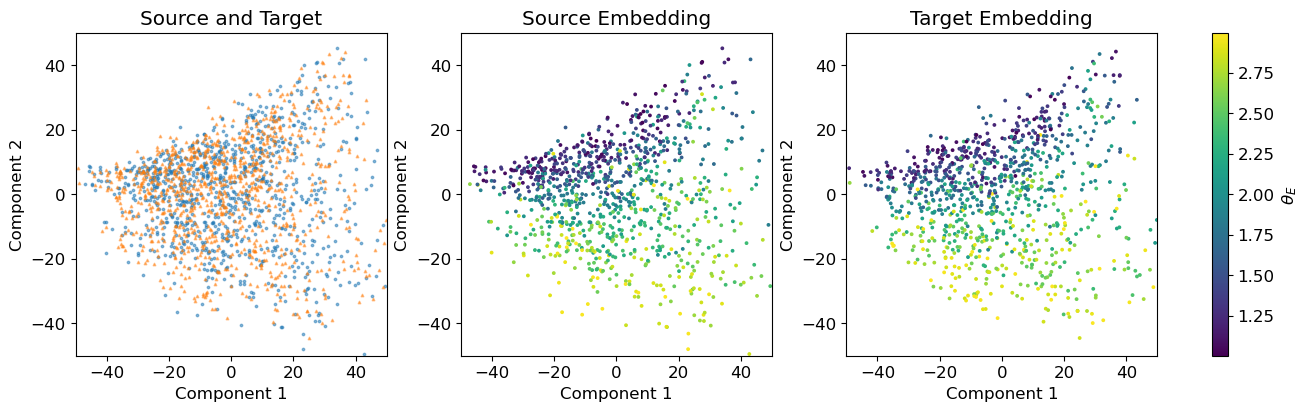

Saving Model... Done.

Epoch 20: 10.68s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0711
	Train Regression Loss: : 0.0244
	Train Mve Loss: : -0.0752
	Train R2 Score: : 0.9251
 Validation Statistics:
	Val Source Regression Loss: : 0.0257
	Val Target Regression Loss: : 0.0283
	Val Source R2 Score: : 0.9197
	Val Target R2 Score: : 0.9126
	Val Source Mve Loss: : -0.0676
	Val Target Mve Loss: : -0.0647
Saving Model... Done.

Epoch 21: 10.94s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0709
	Train Regression Loss: : 0.0237
	Train Mve Loss: : -0.0713
	Train R2 Score: : 0.9271
 Validation Statistics:
	Val Source Regression Loss: : 0.0257
	Val Target Regression Loss: : 0.0286
	Val Source R2 Score: : 0.9221
	Val Target R2 Score: : 0.9115
	Val Source Mve Loss: : -0.0707
	Val Target Mve Loss: : -0.0679

Epoch 22: 10.74s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0699
	Train Regression Loss: : 0.0233
	Train M

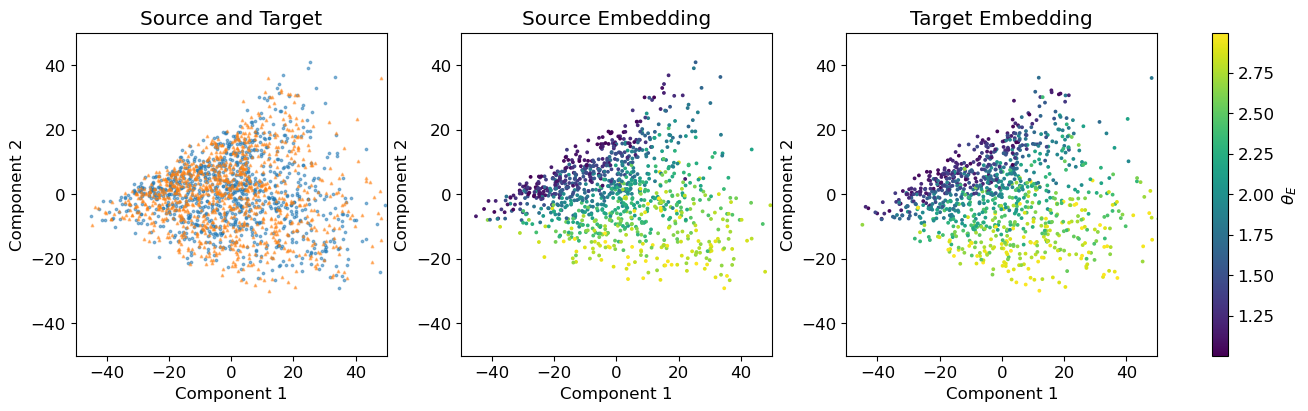


Epoch 40: 10.76s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0690
	Train Regression Loss: : 0.0172
	Train Mve Loss: : -0.1160
	Train R2 Score: : 0.9472
 Validation Statistics:
	Val Source Regression Loss: : 0.0187
	Val Target Regression Loss: : 0.0219
	Val Source R2 Score: : 0.9428
	Val Target R2 Score: : 0.9270
	Val Source Mve Loss: : -0.0433
	Val Target Mve Loss: : -0.0392

Epoch 41: 10.78s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0690
	Train Regression Loss: : 0.0167
	Train Mve Loss: : -0.0722
	Train R2 Score: : 0.9491
 Validation Statistics:
	Val Source Regression Loss: : 0.0173
	Val Target Regression Loss: : 0.0203
	Val Source R2 Score: : 0.9471
	Val Target R2 Score: : 0.9368
	Val Source Mve Loss: : -0.1751
	Val Target Mve Loss: : -0.1729

Epoch 42: 11.65s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0694
	Train Regression Loss: : 0.0168
	Train Mve Loss: : -0.0803
	Train R2 Score: : 0.9484

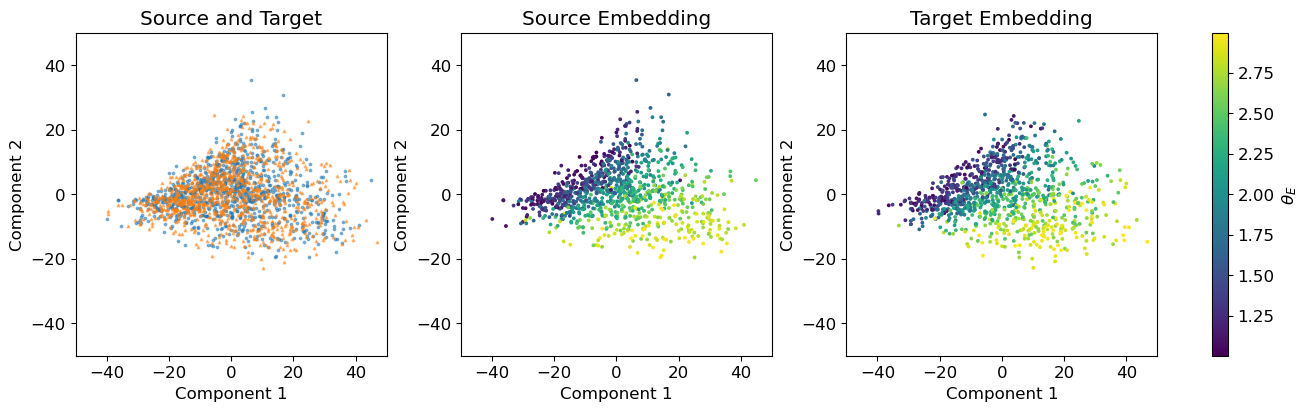

Saving Model MVE... Done.

Epoch 60: 12.06s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0708
	Train Regression Loss: : 0.0147
	Train Mve Loss: : -0.0992
	Train R2 Score: : 0.9551
 Validation Statistics:
	Val Source Regression Loss: : 0.0152
	Val Target Regression Loss: : 0.0171
	Val Source R2 Score: : 0.9538
	Val Target R2 Score: : 0.9473
	Val Source Mve Loss: : -0.0696
	Val Target Mve Loss: : -0.0675
Saving Model... Done.

Epoch 61: 11.94s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0719
	Train Regression Loss: : 0.0145
	Train Mve Loss: : -0.1081
	Train R2 Score: : 0.9553
 Validation Statistics:
	Val Source Regression Loss: : 0.0160
	Val Target Regression Loss: : 0.0188
	Val Source R2 Score: : 0.9514
	Val Target R2 Score: : 0.9413
	Val Source Mve Loss: : -0.2305
	Val Target Mve Loss: : -0.2285
Saving Model MVE... Done.

Epoch 62: 10.75s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0711
	Train Regr

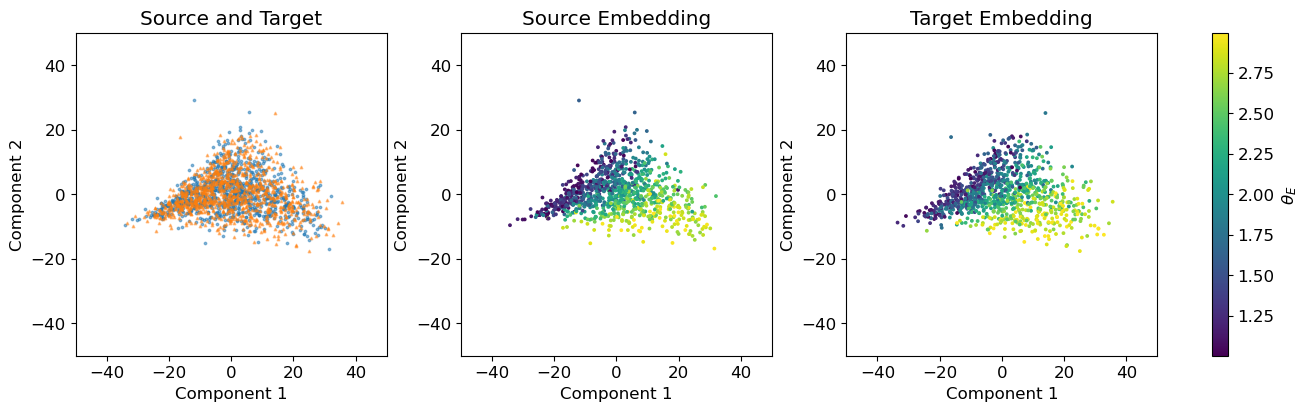


Epoch 80: 12.13s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0718
	Train Regression Loss: : 0.0134
	Train Mve Loss: : -0.1116
	Train R2 Score: : 0.9589
 Validation Statistics:
	Val Source Regression Loss: : 0.0144
	Val Target Regression Loss: : 0.0166
	Val Source R2 Score: : 0.9561
	Val Target R2 Score: : 0.9486
	Val Source Mve Loss: : -0.0927
	Val Target Mve Loss: : -0.0883

Epoch 81: 10.92s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0718
	Train Regression Loss: : 0.0132
	Train Mve Loss: : -0.0979
	Train R2 Score: : 0.9595
 Validation Statistics:
	Val Source Regression Loss: : 0.0141
	Val Target Regression Loss: : 0.0164
	Val Source R2 Score: : 0.9565
	Val Target R2 Score: : 0.9494
	Val Source Mve Loss: : -0.0914
	Val Target Mve Loss: : -0.0883

Epoch 82: 10.71s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0724
	Train Regression Loss: : 0.0132
	Train Mve Loss: : -0.1937
	Train R2 Score: : 0.9594

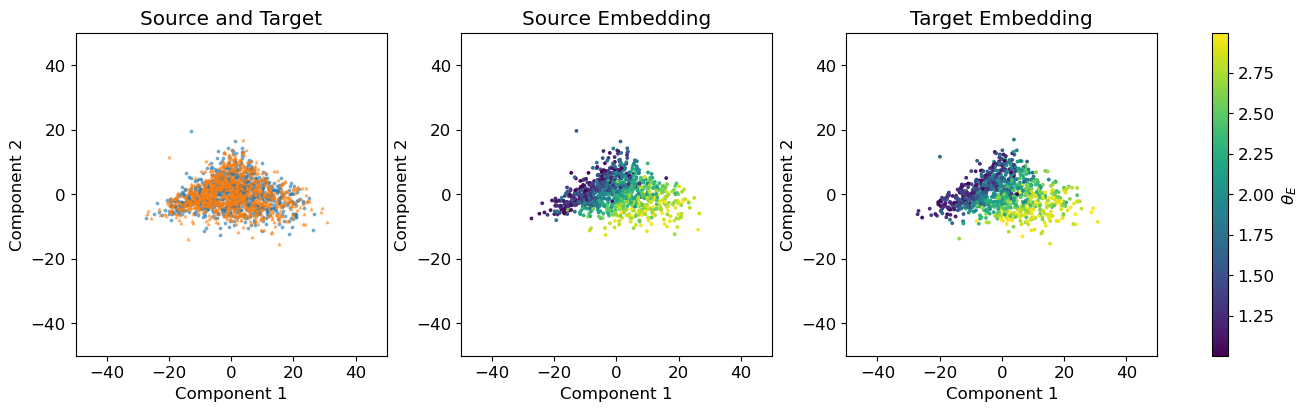


Epoch 100: 10.34s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0751
	Train Regression Loss: : 0.0116
	Train Mve Loss: : -0.1163
	Train R2 Score: : 0.9644
 Validation Statistics:
	Val Source Regression Loss: : 0.0123
	Val Target Regression Loss: : 0.0147
	Val Source R2 Score: : 0.9627
	Val Target R2 Score: : 0.9526
	Val Source Mve Loss: : -0.2198
	Val Target Mve Loss: : -0.2160

Epoch 101: 10.89s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0761
	Train Regression Loss: : 0.0118
	Train Mve Loss: : -0.1236
	Train R2 Score: : 0.9638
 Validation Statistics:
	Val Source Regression Loss: : 0.0123
	Val Target Regression Loss: : 0.0152
	Val Source R2 Score: : 0.9625
	Val Target R2 Score: : 0.9528
	Val Source Mve Loss: : -0.1087
	Val Target Mve Loss: : -0.0993

Epoch 102: 10.97s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0777
	Train Regression Loss: : 0.0117
	Train Mve Loss: : -0.1280
	Train R2 Score: : 0.9

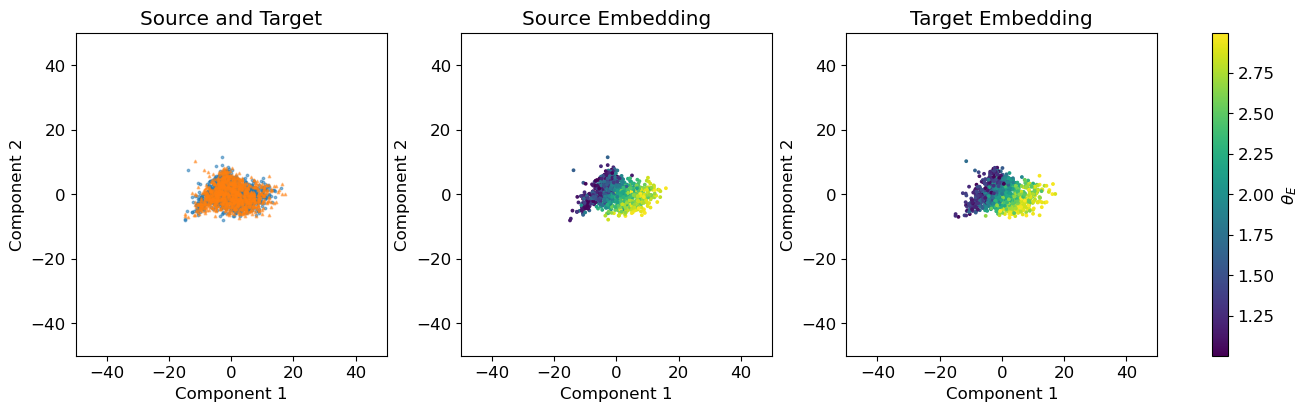


Epoch 120: 10.37s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0830
	Train Regression Loss: : 0.0117
	Train Mve Loss: : -0.1658
	Train R2 Score: : 0.9641
 Validation Statistics:
	Val Source Regression Loss: : 0.0121
	Val Target Regression Loss: : 0.0150
	Val Source R2 Score: : 0.9631
	Val Target R2 Score: : 0.9523
	Val Source Mve Loss: : -0.1564
	Val Target Mve Loss: : -0.1439

Epoch 121: 10.64s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0826
	Train Regression Loss: : 0.0120
	Train Mve Loss: : -0.1705
	Train R2 Score: : 0.9632
 Validation Statistics:
	Val Source Regression Loss: : 0.0114
	Val Target Regression Loss: : 0.0138
	Val Source R2 Score: : 0.9655
	Val Target R2 Score: : 0.9571
	Val Source Mve Loss: : -0.1505
	Val Target Mve Loss: : -0.1383
Saving Model... Done.

Epoch 122: 11.15s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0821
	Train Regression Loss: : 0.0114
	Train Mve Loss: : -0.3030


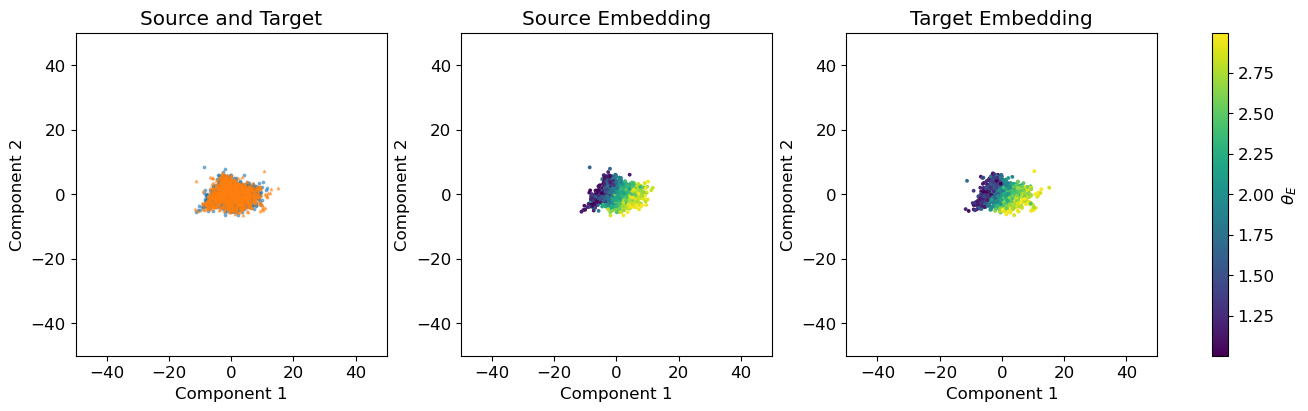


Epoch 140: 10.41s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0849
	Train Regression Loss: : 0.0101
	Train Mve Loss: : -0.2525
	Train R2 Score: : 0.9691
 Validation Statistics:
	Val Source Regression Loss: : 0.0110
	Val Target Regression Loss: : 0.0131
	Val Source R2 Score: : 0.9665
	Val Target R2 Score: : 0.9590
	Val Source Mve Loss: : -0.3991
	Val Target Mve Loss: : -0.3956
Saving Model MVE... Done.

Epoch 141: 11.44s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0848
	Train Regression Loss: : 0.0102
	Train Mve Loss: : -0.2692
	Train R2 Score: : 0.9687
 Validation Statistics:
	Val Source Regression Loss: : 0.0106
	Val Target Regression Loss: : 0.0131
	Val Source R2 Score: : 0.9680
	Val Target R2 Score: : 0.9594
	Val Source Mve Loss: : -0.2186
	Val Target Mve Loss: : -0.1977

Epoch 142: 11.12s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0851
	Train Regression Loss: : 0.0119
	Train Mve Loss: : -0.2

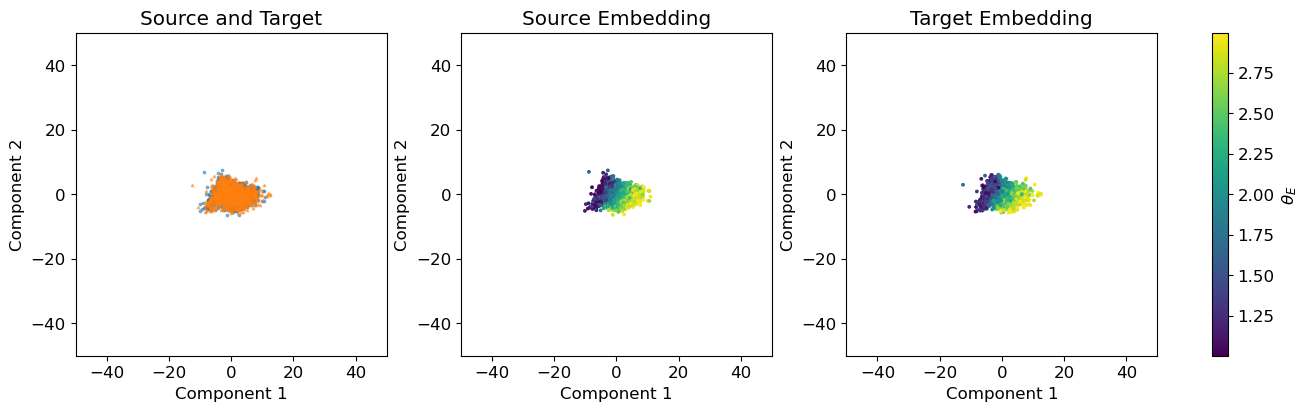


Epoch 160: 14.56s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0855
	Train Regression Loss: : 0.0105
	Train Mve Loss: : -0.3452
	Train R2 Score: : 0.9678
 Validation Statistics:
	Val Source Regression Loss: : 0.0101
	Val Target Regression Loss: : 0.0124
	Val Source R2 Score: : 0.9689
	Val Target R2 Score: : 0.9611
	Val Source Mve Loss: : -0.3442
	Val Target Mve Loss: : -0.3237

Epoch 161: 11.51s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0843
	Train Regression Loss: : 0.0096
	Train Mve Loss: : -0.4666
	Train R2 Score: : 0.9709
 Validation Statistics:
	Val Source Regression Loss: : 0.0102
	Val Target Regression Loss: : 0.0124
	Val Source R2 Score: : 0.9688
	Val Target R2 Score: : 0.9613
	Val Source Mve Loss: : -0.4861
	Val Target Mve Loss: : -0.4813
Saving Model MVE... Done.

Epoch 162: 11.37s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0859
	Train Regression Loss: : 0.0095
	Train Mve Loss: : -0.4

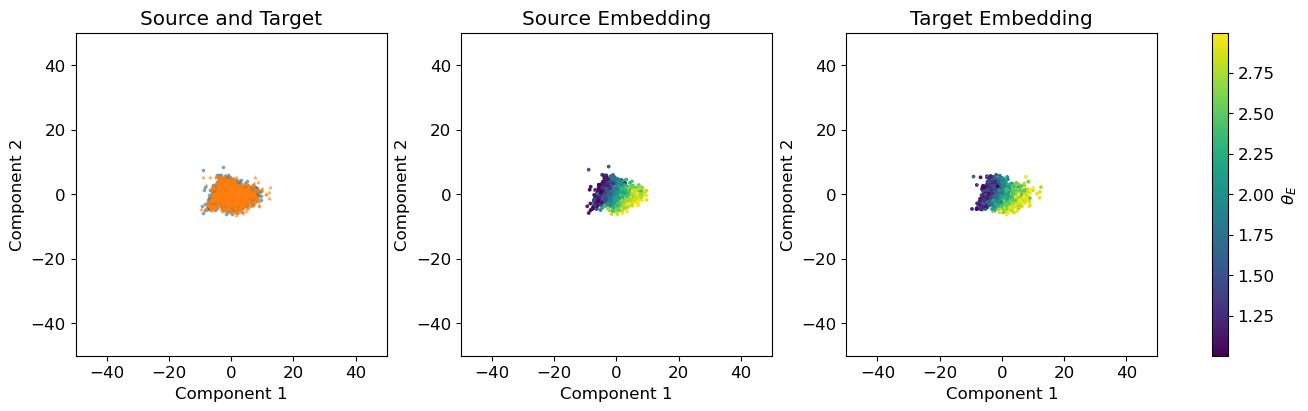


Epoch 180: 12.04s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0860
	Train Regression Loss: : 0.0084
	Train Mve Loss: : -0.4788
	Train R2 Score: : 0.9741
 Validation Statistics:
	Val Source Regression Loss: : 0.0086
	Val Target Regression Loss: : 0.0110
	Val Source R2 Score: : 0.9737
	Val Target R2 Score: : 0.9660
	Val Source Mve Loss: : -0.4866
	Val Target Mve Loss: : -0.4479
Saving Model... Done.

Epoch 181: 10.80s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0857
	Train Regression Loss: : 0.0085
	Train Mve Loss: : -0.4923
	Train R2 Score: : 0.9740
 Validation Statistics:
	Val Source Regression Loss: : 0.0094
	Val Target Regression Loss: : 0.0113
	Val Source R2 Score: : 0.9712
	Val Target R2 Score: : 0.9650
	Val Source Mve Loss: : -0.4533
	Val Target Mve Loss: : -0.4163

Epoch 182: 11.39s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0865
	Train Regression Loss: : 0.0083
	Train Mve Loss: : -0.5556


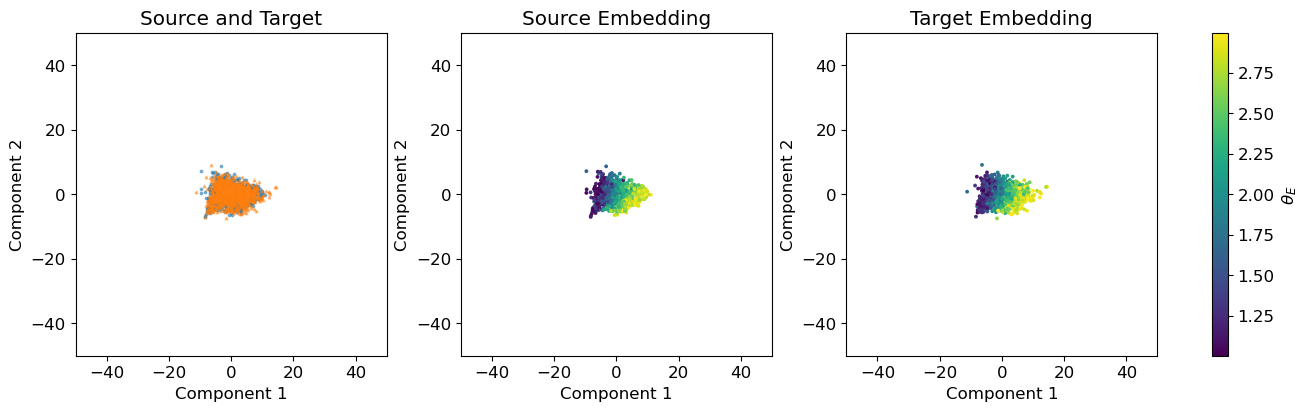


Epoch 200: 10.66s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0851
	Train Regression Loss: : 0.0086
	Train Mve Loss: : -0.6286
	Train R2 Score: : 0.9736
 Validation Statistics:
	Val Source Regression Loss: : 0.0092
	Val Target Regression Loss: : 0.0114
	Val Source R2 Score: : 0.9719
	Val Target R2 Score: : 0.9643
	Val Source Mve Loss: : -0.7292
	Val Target Mve Loss: : -0.6801

Epoch 201: 9.46s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0853
	Train Regression Loss: : 0.0099
	Train Mve Loss: : -0.7281
	Train R2 Score: : 0.9695
 Validation Statistics:
	Val Source Regression Loss: : 0.0109
	Val Target Regression Loss: : 0.0129
	Val Source R2 Score: : 0.9670
	Val Target R2 Score: : 0.9604
	Val Source Mve Loss: : -0.7752
	Val Target Mve Loss: : -0.7504
Saving Model MVE... Done.

Epoch 202: 9.69s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0853
	Train Regression Loss: : 0.0150
	Train Mve Loss: : -0.708

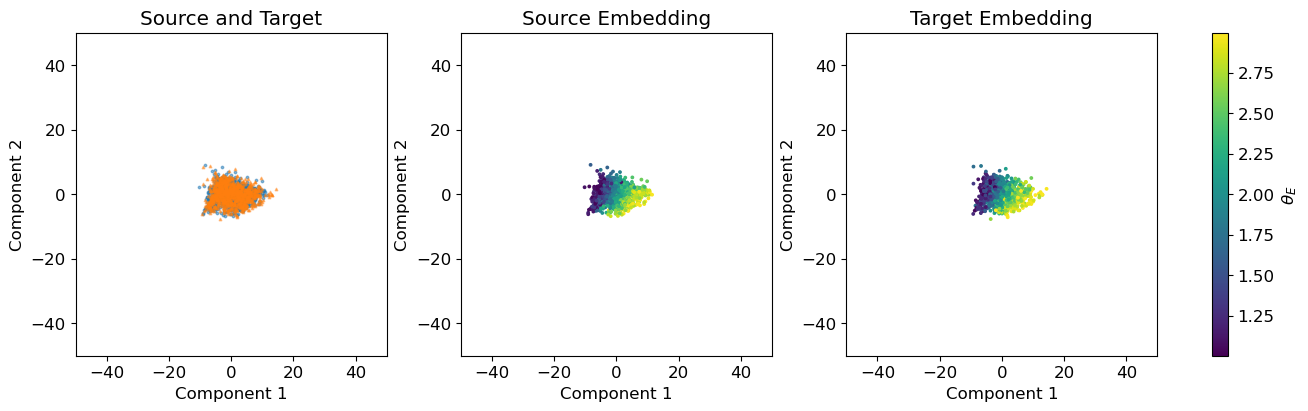

Saving Model MVE... Done.

Epoch 220: 12.44s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0861
	Train Regression Loss: : 0.0080
	Train Mve Loss: : -1.0992
	Train R2 Score: : 0.9755
 Validation Statistics:
	Val Source Regression Loss: : 0.0078
	Val Target Regression Loss: : 0.0096
	Val Source R2 Score: : 0.9760
	Val Target R2 Score: : 0.9703
	Val Source Mve Loss: : -1.0990
	Val Target Mve Loss: : -1.0212

Epoch 221: 10.38s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0846
	Train Regression Loss: : 0.0486
	Train Mve Loss: : -0.6845
	Train R2 Score: : 0.8505
 Validation Statistics:
	Val Source Regression Loss: : 0.0280
	Val Target Regression Loss: : 0.0288
	Val Source R2 Score: : 0.9147
	Val Target R2 Score: : 0.9102
	Val Source Mve Loss: : -0.8282
	Val Target Mve Loss: : -0.8238

Epoch 222: 12.62s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0867
	Train Regression Loss: : 0.0172
	Train Mve Loss: : -0.9

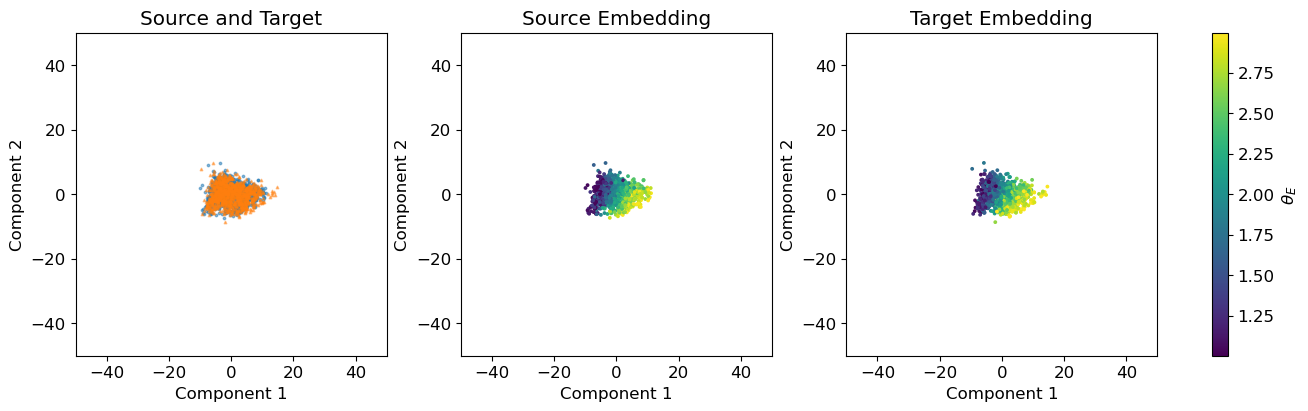


Epoch 240: 9.57s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0856
	Train Regression Loss: : 0.0072
	Train Mve Loss: : -1.4946
	Train R2 Score: : 0.9780
 Validation Statistics:
	Val Source Regression Loss: : 0.0079
	Val Target Regression Loss: : 0.0099
	Val Source R2 Score: : 0.9759
	Val Target R2 Score: : 0.9694
	Val Source Mve Loss: : -1.5957
	Val Target Mve Loss: : -1.4996
Saving Model MVE... Done.

Epoch 241: 9.81s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0859
	Train Regression Loss: : 0.0069
	Train Mve Loss: : -1.7209
	Train R2 Score: : 0.9788
 Validation Statistics:
	Val Source Regression Loss: : 0.0074
	Val Target Regression Loss: : 0.0095
	Val Source R2 Score: : 0.9775
	Val Target R2 Score: : 0.9695
	Val Source Mve Loss: : -1.7155
	Val Target Mve Loss: : -1.5827
Saving Model MVE... Done.

Epoch 242: 10.90s
-------------------------------
 Training Statistics:
	Train Da Loss: : 0.0860
	Train Regression Loss: : 0.0069

In [8]:
print("Beginning Training...")


for curr_epoch in range(stats['epoch_no'], stats['epoch_no'] + n_epoch):

        # Generate isomaps every 20 epochs
        if (curr_epoch % 20 == 0):
            print("Generating Isomap...")
            source_iso, target_iso = generate_isomaps(source_data, target_data, model)
            show_isomaps(source_iso, 
                         target_iso, 
                         isomap_source_label_sample, 
                         isomap_target_label_sample, 
                         save_mod_name, 
                         name = stats["epoch_no"], 
                         axlim = 50, save = True)

        # Save best models
        if (len(stats['val_target_r2_score']) > 0):
            
            # Save and overwrite model every best target R2
            if (stats['val_target_r2_score'][-1] > best_target_R2):
                print("Saving Model...", end = ' ')
                save_model(save_mod_name, model, optimizer, stats)
                best_target_R2 = stats['val_target_r2_score'][-1]
                print("Done.")
                
            # Save and overwrite model every best target MVE Loss
            if (stats['val_target_mve_loss'][-1] < best_mve_loss):
                print("Saving Model MVE...", end = ' ')
                mve_name = save_mod_name + "_mve"
                save_model(mve_name, model, optimizer, stats)
                best_mve_loss = stats['val_target_mve_loss'][-1]
                print("Done.")

        
        start_time = time.time()

        beta = beta_function(curr_epoch)
        da_weight = da_weight_function(curr_epoch)

        # Train, backpropagate
        vals = train_loop_mve(source_train_dataloader, 
                              target_train_dataloader, 
                              model,
                              regressor_loss_fn, 
                              da_loss_fn, 
                              optimizer,
                              da_weight, 
                              beta)

        # Test, validate metrics
        vals_validate = test_loop_mve(source_val_dataloader, 
                                      target_val_dataloader,
                                      model, 
                                      regressor_loss_fn, 
                                      beta)

        # Training Metrics
        stats['train_DA_loss'].append(vals[0])
        stats['train_regression_loss'].append(vals[1])
        stats['train_mve_loss'].append(vals[2])
        stats['train_r2_score'].append(vals[3])

        # Validation Metrics
        stats['val_source_regression_loss'].append(vals_validate[0])
        stats['val_target_regression_loss'].append(vals_validate[1])
        stats['val_source_r2_score'].append(vals_validate[2])
        stats['val_target_r2_score'].append(vals_validate[3])
        stats['val_source_mve_loss'].append(vals_validate[4])
        stats['val_target_mve_loss'].append(vals_validate[5])
        
        # Other Parameters
        stats['da_weight'].append(da_weight)
        stats['beta'].append(beta)
        stats['epoch_no'] += 1

        print_epoch_scores(stats, curr_epoch, time.time() - start_time)

In [9]:
# Saves the end result model after running for all stages, as well as the .json of stats

state = {
    'epoch': stats['epoch_no'],
    'state_dict': model.state_dict(),
    'optimizer': optimizer.state_dict(),
}
final_mod_name = save_mod_name + "_final"
torch.save(state, final_mod_name)
json.dump(stats, open(final_mod_name+'.json', 'w'))

## Visualize Results

In [10]:
# Loads a model for plotting/viz

viz_mod_name = final_mod_name # "models/start_code_test_4_final"
model.load_state_dict(torch.load(viz_mod_name)['state_dict'])
stats = json.load(open(viz_mod_name+'.json', 'r'))

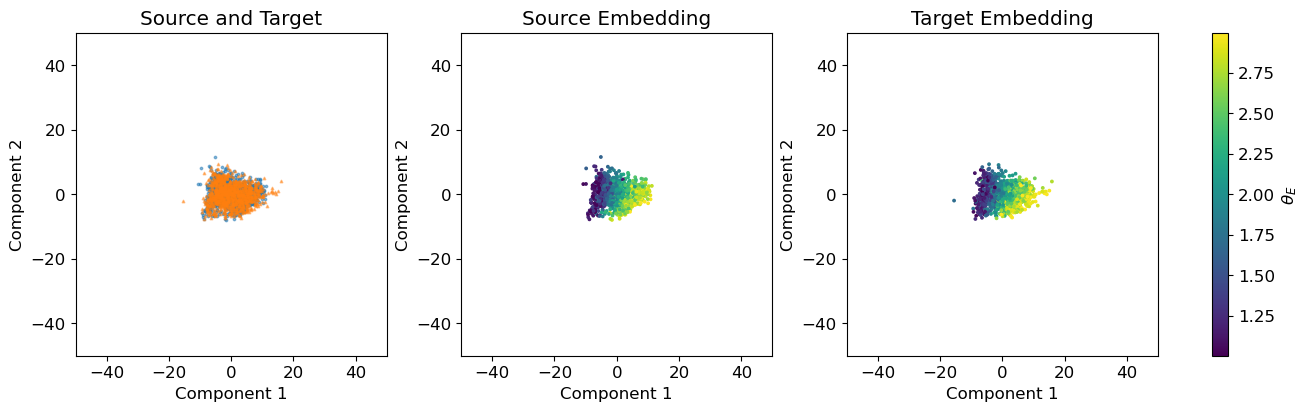

(<Figure size 1300x400 with 4 Axes>,
 array([<Axes: title={'center': 'Source and Target'}, xlabel='Component 1', ylabel='Component 2'>,
        <Axes: title={'center': 'Source Embedding'}, xlabel='Component 1', ylabel='Component 2'>,
        <Axes: title={'center': 'Target Embedding'}, xlabel='Component 1', ylabel='Component 2'>],
       dtype=object))

In [11]:
# Visualize isomaps 
trained_source_iso, trained_target_iso = generate_isomaps(source_data, target_data, model)
show_isomaps(trained_source_iso, trained_target_iso, isomap_source_label_sample, isomap_target_label_sample, viz_mod_name, axlim = 50)

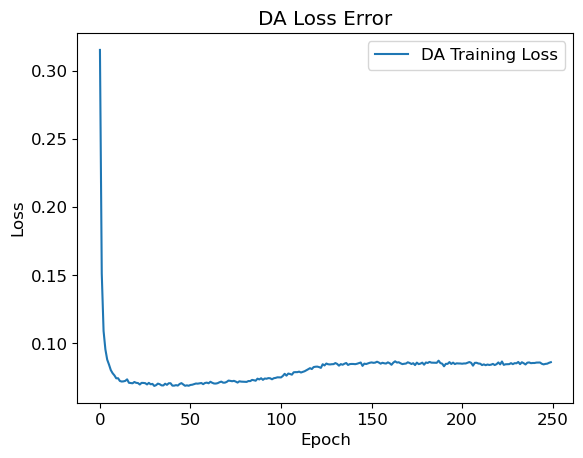

In [12]:
# DA Loss
fmt = lambda k: " ".join([i.capitalize() for i in k.split('_')])
eps = np.arange(stats["epoch_no"])
plt.title("DA Loss Error")
plt.plot(eps, stats['train_DA_loss'], label = "DA Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

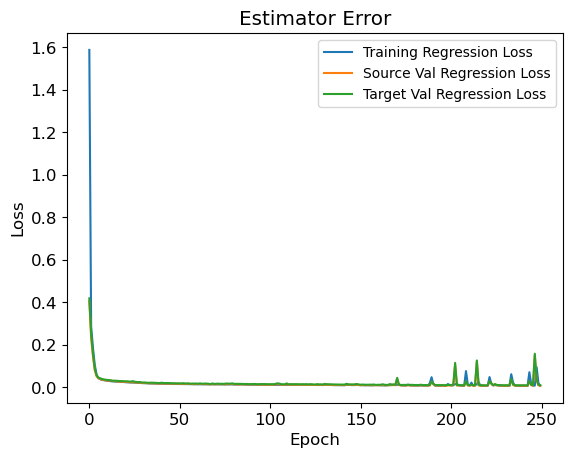

In [13]:
# Estimator / Regression
plt.title("Estimator Error")
plt.plot(eps, stats['train_regression_loss'], label = "Training Regression Loss")
plt.plot(eps, stats['val_source_regression_loss'], label = "Source Val Regression Loss")
plt.plot(eps, stats['val_target_regression_loss'], label = "Target Val Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(fontsize = 'small')

(-1.0, 1.0)

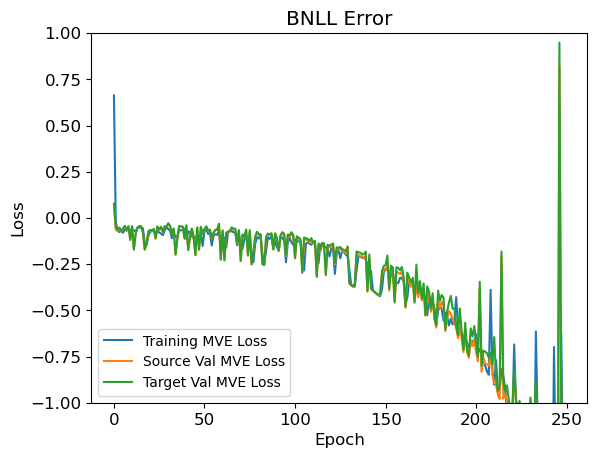

In [14]:
# BNLL for MVE
plt.title("BNLL Error")
plt.plot(eps, stats['train_mve_loss'], label = "Training MVE Loss")
plt.plot(eps, stats['val_source_mve_loss'], label = "Source Val MVE Loss")
plt.plot(eps, stats['val_target_mve_loss'], label = "Target Val MVE Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(fontsize = 'small')
plt.ylim(-1, 1)

(0.5, 1.0)

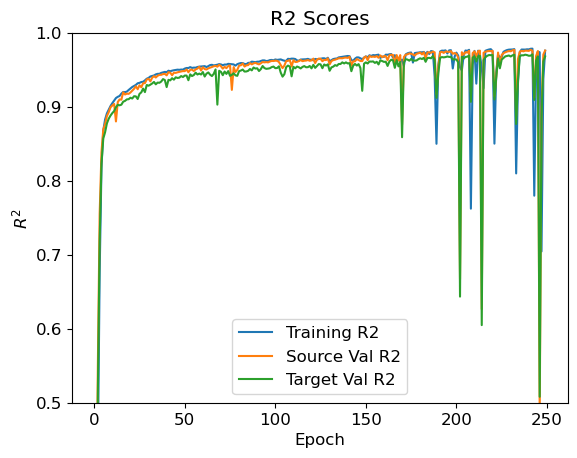

In [15]:
# R2 Scores
plt.title("R2 Scores")
plt.plot(eps, stats['train_r2_score'], label = "Training R2")
plt.plot(eps, stats['val_source_r2_score'], label = "Source Val R2")
plt.plot(eps, stats['val_target_r2_score'], label = "Target Val R2")
plt.xlabel("Epoch")
plt.ylabel("$R^2$")
plt.legend()
plt.ylim(0.5, 1)

In [26]:
# Test Source
var_preds_source = np.array([])
preds_source = np.array([])
true_source = np.array([])
lbnll_source = np.array([])
score_list = np.array([])

with torch.no_grad():
    for X, y in source_test_dataloader:
        X = X.float()
        pred, _ = model(X.cuda())
        preds_source = np.append(preds_source, pred[:, 0].cpu())
        var_preds_source = np.append(var_preds_source, pred[:, 1].cpu())
        true_source = np.append(true_source, y.cpu())
        score = r2_score(y.cpu(), pred[:, 0].cpu())
        score_list = np.append(score_list, score)
        lbnll_source = np.append(lbnll_source, loss_bnll(pred[:, 0].cpu(), pred[:, 1].cpu(), y, beta = 0.5))

score = np.mean(score_list)
print(f'Source R2 Score is {score:.4f}')

Source R2 Score is 0.9767


Text(0.5, 1.0, 'MMD | Source | R2: 0.977')

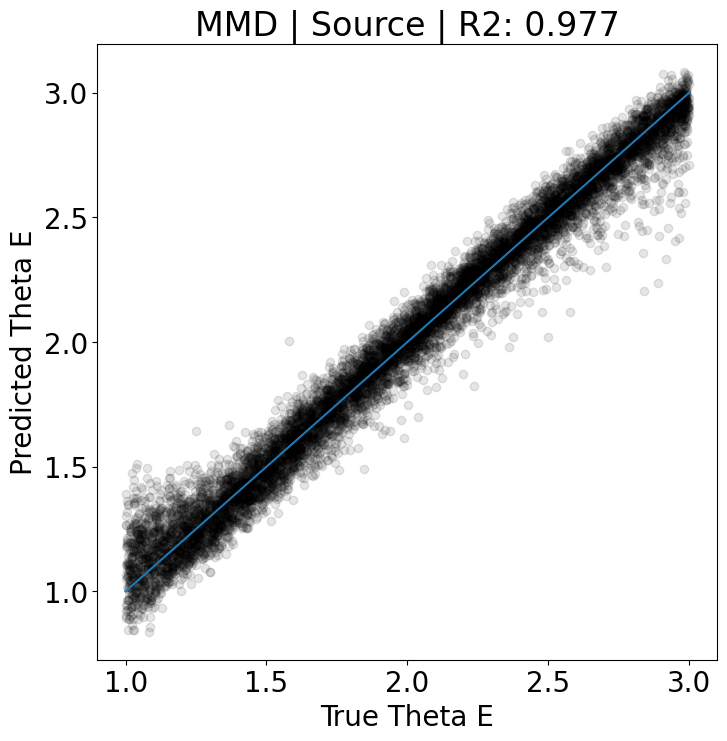

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(true_source, preds_source,  color='black', alpha = 0.1)
line = np.linspace(1, 3, 100)
plt.plot(line, line)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Predicted Theta E');
plt.rc('font', size=20)
plt.title('MMD | Source | R2: {0:.3f}'.format(np.mean(score_list)))

Text(0.5, 1.0, 'Uncertainty | Source | BNLL: -0.175')

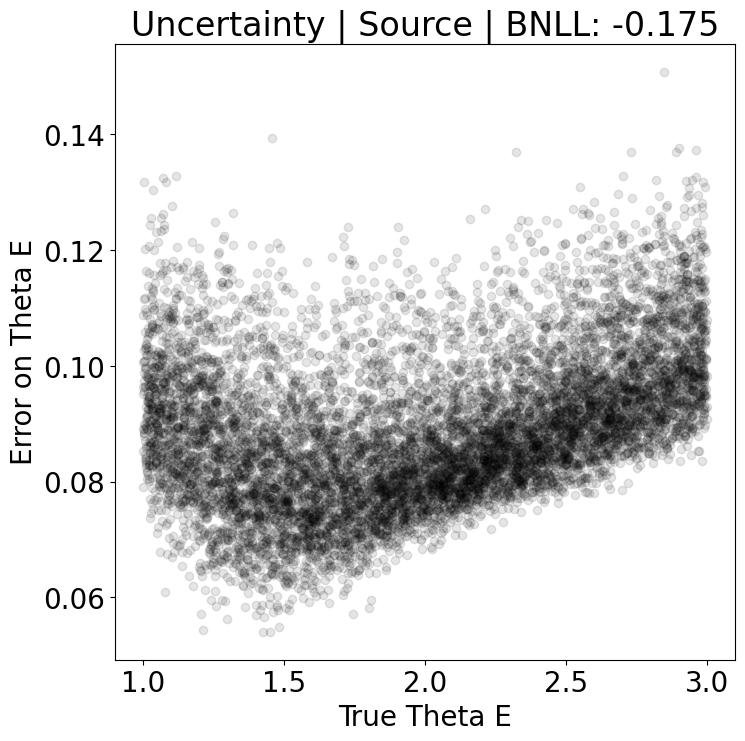

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(true_source, np.sqrt(var_preds_source),  color='black', alpha = 0.1)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Error on Theta E');
plt.rc('font', size=20)
plt.title('Uncertainty | Source | BNLL: {0:.3f}'.format(np.mean(lbnll_source)))

In [29]:
# Test target
preds_target = np.array([])
var_preds_target = np.array([])
true_target = np.array([])
score_list = np.array([])
lbnll_target = np.array([])


with torch.no_grad():
    for X, y in target_test_dataloader:
        X = X.float()
        pred, _ = model(X.cuda())
        preds_target = np.append(preds_target, pred[:, 0].cpu())
        var_preds_target = np.append(var_preds_target, pred[:, 1].cpu())
        true_target = np.append(true_target, y.cpu())
        score = r2_score(y.cpu(), pred[:, 0].cpu())
        score_list = np.append(score_list, score)
        lbnll_target = np.append(lbnll_target, loss_bnll(pred[:, 0].cpu(), pred[:, 1].cpu(), y, beta = 0.5))


score = np.mean(score_list)
print(f'Target R2 Score is {score:.4f}')

Target R2 Score is 0.9661


Text(0.5, 1.0, 'MMD | Target | R2: 0.966')

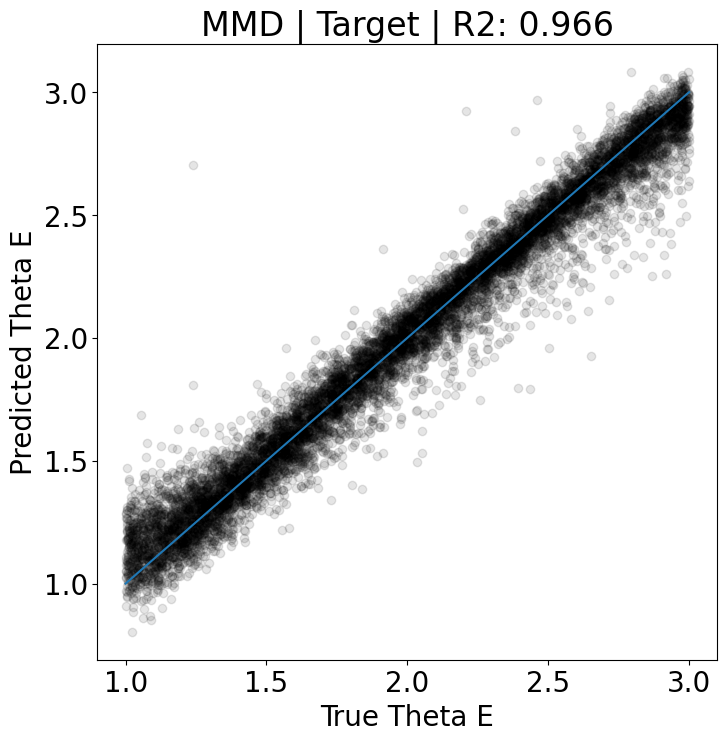

In [30]:
plt.figure(figsize=(8,8))
plt.scatter(true_target, preds_target,  color='black', alpha = 0.1)
line = np.linspace(1, 3, 100)
plt.plot(line, line)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Predicted Theta E');
plt.rc('font', size=20)
plt.title('MMD | Target | R2: {0:.3f}'.format(np.mean(score_list)))

Text(0.5, 1.0, 'MMD | Target | R2: 0.966')

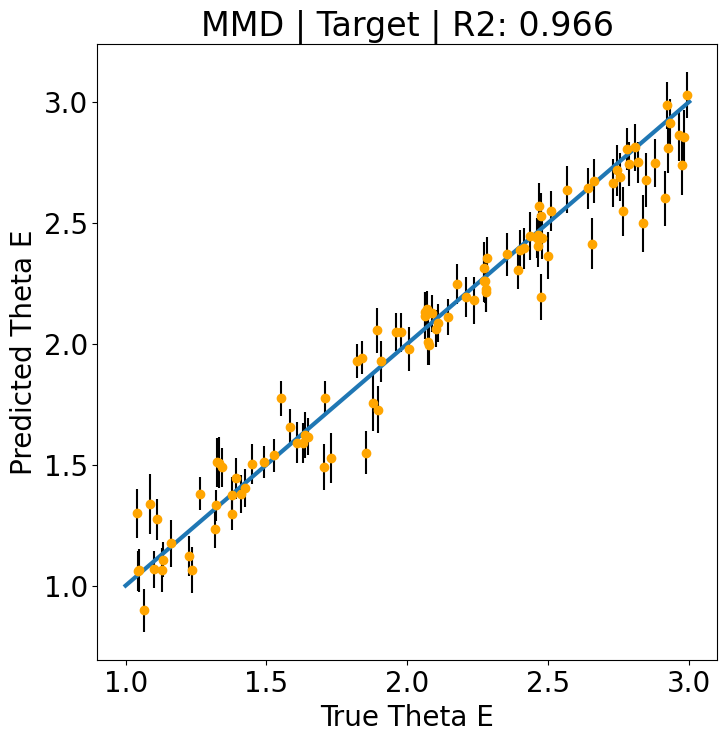

In [31]:
plt.figure(figsize=(8,8))
idx = np.random.choice(np.arange(len(true_target)), 100)
plt.errorbar(true_target[idx], preds_target[idx], yerr = np.sqrt(var_preds_target[idx]), fmt = 'o', color='orange', ecolor = 'k', alpha = 1)
line = np.linspace(1, 3, 100)
plt.plot(line, line, lw = 3)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Predicted Theta E');
plt.rc('font', size=20)
plt.title('MMD | Target | R2: {0:.3f}'.format(np.mean(score_list)))

Text(0.5, 1.0, 'Uncertainty | Target | BNLL: -0.156')

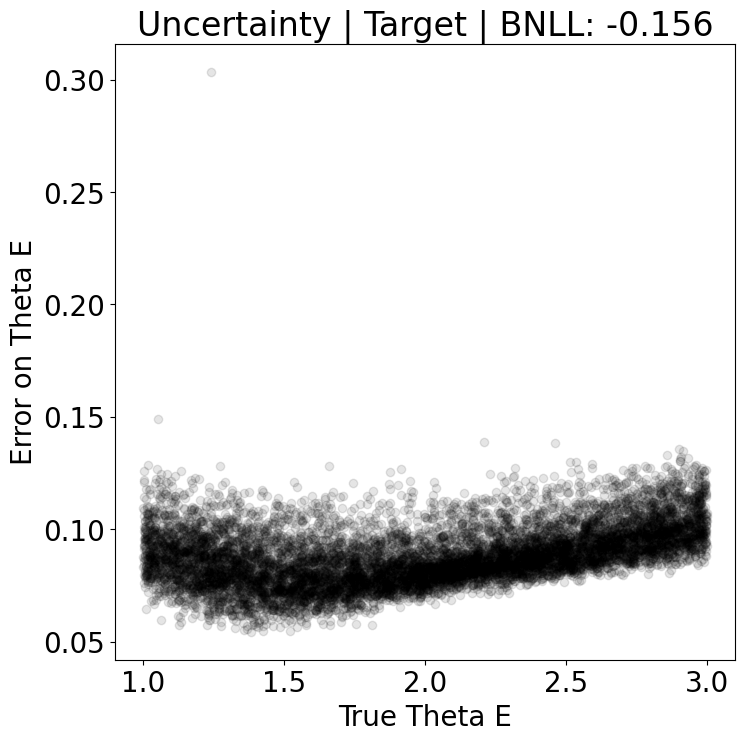

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(true_target, np.sqrt(var_preds_target),  color='black', alpha = 0.1)
plt.rc('font', size=12)
plt.xlabel('True Theta E')
plt.ylabel('Error on Theta E');
plt.rc('font', size=20)
plt.title('Uncertainty | Target | BNLL: {0:.3f}'.format(np.mean(lbnll_target)))

In [33]:
def sample_variance(obs, true):
    return np.std(obs - true) ** 2

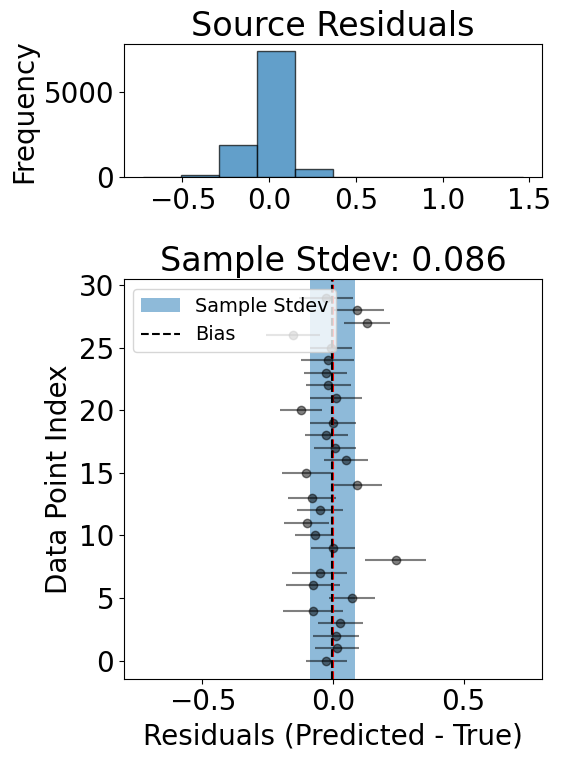

In [34]:
n_points = 30
rand_idx = np.random.choice(np.arange(len(preds_source)), n_points)
residuals = preds_source[rand_idx] - true_source[rand_idx]
resid_all = preds_target - true_target
errors = np.sqrt(var_preds_source[rand_idx])
sv = np.sqrt(sample_variance(preds_source, true_source))
mn = np.mean(resid_all)

# Create the figure and axes
fig, (ax_hist, ax_resid) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(6, 8))



# Plot the histogram
ax_hist.hist(resid_all, bins=10, edgecolor='black', alpha=0.7)
ax_hist.set_title('Source Residuals')
ax_hist.set_ylabel('Frequency')

# Plot the residuals with error bars in the x-direction
ax_resid.errorbar(x=residuals, y=np.arange(n_points), xerr=errors, fmt='o', alpha=0.5, ecolor = 'k', color = 'k')
ax_resid.axvline(x=0, color='red', linestyle='--')
ax_resid.set_xlabel('Residuals (Predicted - True)')
ax_resid.set_ylabel('Data Point Index')
ax_resid.set_title('Sample Stdev: {0:.3f}'.format(sv))
ax_resid.axvspan(mn-sv, mn+sv, alpha = 0.5, label = "Sample Stdev")
ax_resid.axvline(mn, color = 'k', ls = '--', label = "Bias")
ax_resid.legend(loc = 'upper left', fontsize = 'x-small')

plt.xlim(-0.8, 0.8)

plt.tight_layout()
plt.show()

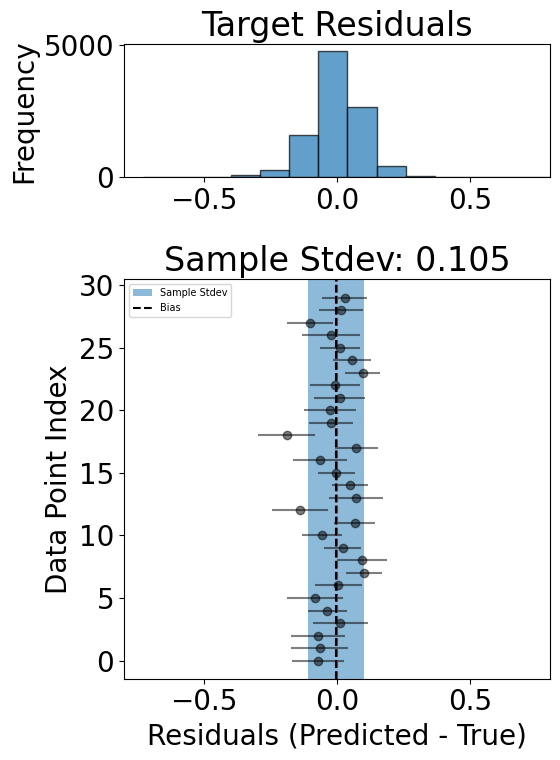

In [38]:
n_points = 30
rand_idx = np.random.choice(np.arange(len(preds_source)), n_points)
residuals = preds_target[rand_idx] - true_target[rand_idx]
resid_all = preds_target - true_target
errors = np.sqrt(var_preds_target[rand_idx])
sv = np.sqrt(sample_variance(preds_target, true_target))
mn = np.mean(resid_all)
# Create the figure and axes
fig, (ax_hist, ax_resid) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]}, figsize=(6, 8))



# Plot the histogram
ax_hist.hist(resid_all, bins=20, edgecolor='black', alpha=0.7)
ax_hist.set_title('Target Residuals')
ax_hist.set_ylabel('Frequency')

# Plot the residuals with error bars in the x-direction
ax_resid.errorbar(x=residuals, y=np.arange(n_points), xerr=errors, fmt='o', alpha=0.5, ecolor = 'k', color = 'k')
ax_resid.axvline(x=0, color='red', linestyle='--')
ax_resid.set_xlabel('Residuals (Predicted - True)')
ax_resid.set_ylabel('Data Point Index')
ax_resid.set_title('Sample Stdev: {0:.3f}'.format(sv))
ax_resid.axvspan(mn-sv, mn+sv, alpha = 0.5, label = "Sample Stdev")
ax_resid.axvline(mn, color = 'k', ls = '--', label = "Bias")
ax_resid.legend(loc = 'upper left', fontsize = 7)
ax_resid.sharex(ax_hist)

plt.xlim(-0.8, 0.8)

plt.tight_layout()
plt.show()